Sajikan, deskripsikan, dan ringkas data secara visual dengan beberapa grafik. Diantaranya ialah sebagai berikut. <br>
- box plots <br>
- histogram <br>
- pie charts <br>
- bar charts <br>
- X-Y plots <br>
- heatmaps

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import statistics
import scipy.stats
from IPython.display import Math, Latex
%matplotlib inline

In [98]:
df_can = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [139]:
# rename OdName menjadi Country , AreaName menjadi Continent, RegName menjadi Region
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [101]:
pd.set_option('display.max_columns', None)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [102]:
df_can.sum(axis=1)
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

C:\Users\Axioo\AppData\Local\Temp\ipykernel_6496\21170192.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can.sum(axis=1)
C:\Users\Axioo\AppData\Local\Temp\ipykernel_6496\21170192.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [103]:
df_can.set_index('Country',inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [104]:
df_can.index.name=None
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [105]:
df_can.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [106]:
df_can.columns = list(map(str,df_can.columns))
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [107]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [112]:
years = list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [142]:
df_japan = df_can.loc[['Japan'],years].T
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


In [143]:
df_japan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1980 to 2013
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Japan   34 non-null     int64
dtypes: int64(1)
memory usage: 544.0+ bytes


In [144]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Box plot

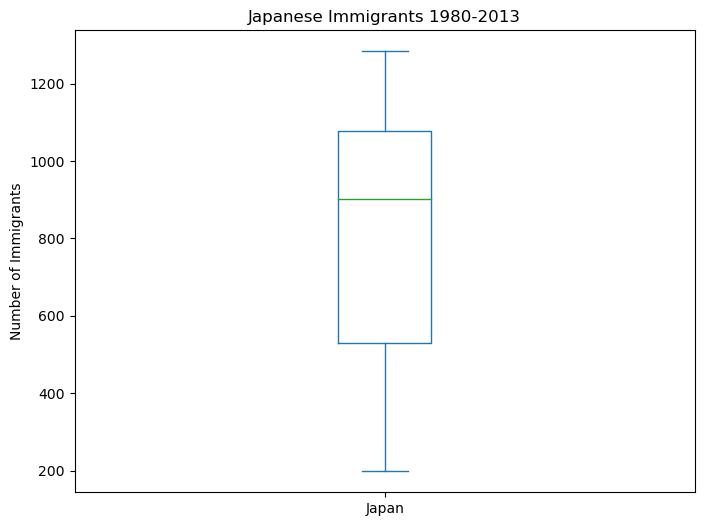

In [146]:
df_japan.plot(kind='box',figsize=(8,6))
plt.title('Japanese Immigrants 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

Box plot merupakan cara untuk merepresentasikan distribusi data melalui lima dimensi utama, yaitu : minimum, Q1, median(Q2), Q3, dan maksimum. <br>
Berdasarkan box plot yang diperoleh, dapat diasumsikan bahwa data-data "Japanese Immigrants 1980 - 2013" memiliki nilai-nilai pada lima dimensi utama sebagai berikut. <br>
- min $\leq$ 200 (garis terbawah) <br>
- Q1 $\leq$ 550 (garis bawah box) <br>
- median $\pm$ 900 (garis hijau) <br>  
- Q3 $\leq$ 1100(garis teratas) <br>
- max $\leq$ 1300 (garis atas box) 

Histogram

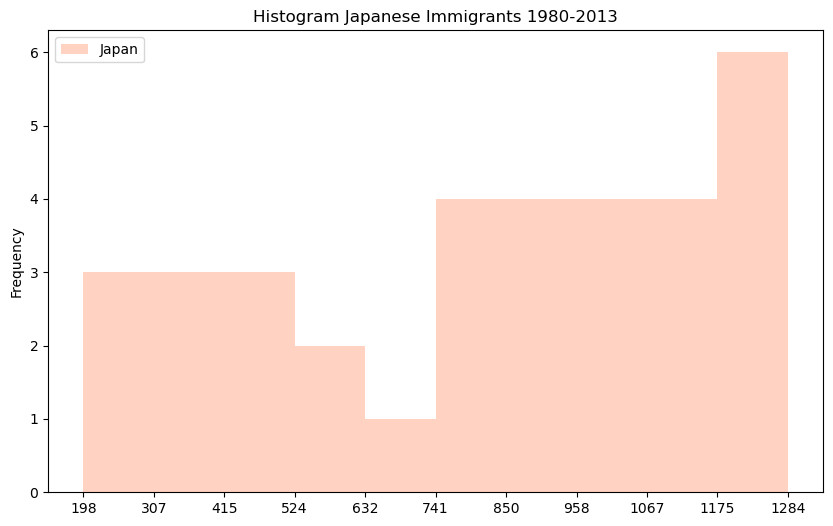

In [147]:
count, bin_edges = np.histogram(df_japan)
df_japan.plot(kind='hist',figsize=(10,6), bins=10,alpha=0.35,xticks=bin_edges, color='coral')
plt.title('Histogram Japanese Immigrants 1980-2013')
plt.show()

Histogram merupakan cara untuk merepresentasikan distribusi frekuensi dataset. <br>
Berdasarkan histogram yang diperoleh, dapat diasumsikan x merupakan jumlah imigran per tahun,  dan data-data  "Japanese Immigrants 1980 - 2013" memiliki nilai-nilai persebaran imigrant sebagai berikut. <br>
- Ada 9 data tahun yang memiliki jumlah imigran $x \leq 524$ <br>
- Ada 2 data tahun yang memiliki jumlah imigran diantara $524\leq x \leq 632$ <br>
- Ada 1 data tahun yang memiliki jumlah imigran diantara $632\leq x \leq 741$ <br>  
- Ada 16 data tahun yang memiliki jumlah imigran diantara $741\leq x \leq 1175$ <br>
- Ada 6 data tahun yang memiliki jumlah imigran diantara $1175\leq x \leq 1284$ 

Pie chart

In [124]:
df_continents = df_can.groupby('Continent').sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


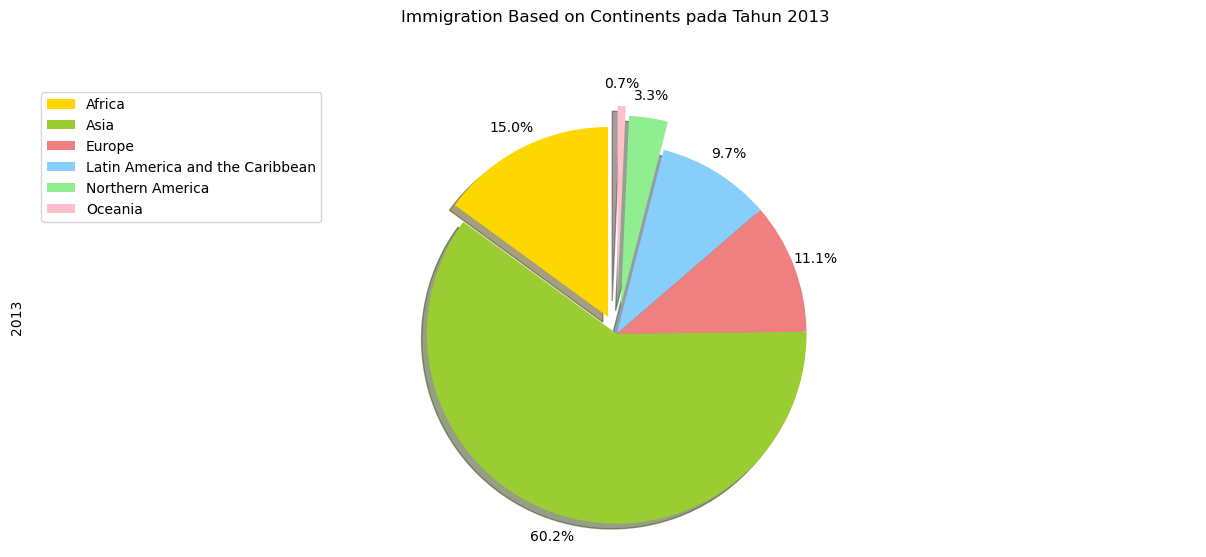

In [151]:
colors_list = ['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink']
explode_list = [0.1,0,0,0,0.15,0.2 ]

df_continents['2013'].plot(kind='pie',
                          figsize=(15,6),
                          autopct='%1.1f%%',
                          startangle=90,
                          shadow=True,
                          labels=None,
                          pctdistance=1.12,
                          colors=colors_list,
                          explode=explode_list)

plt.legend(labels=df_continents.index,loc='upper left')
plt.axis('equal')
plt.title('Immigration Based on Continents pada Tahun 2013',y=1.12)
plt.show()

Pie chart merupakan grafik yang menampilkan proporsi numerik dengan membagi lingkaran sejumlah bagian yang proporsional. Dalam data ini lingkaran terbagi menjadi 6 bagian, yaitu berdasarkan indeks benua. Akibatnya, diperoleh data sebagai berikut <br>
- Jumlah imigran dari benua Africa terdapat 15% <br>
- Jumlah imigran dari benua Asia terdapat 60.2% <br>
- Jumlah imigran dari benua Europe terdapat 11.1% <br>
- Jumlah imigran dari benua Latin America and the Caribbean terdapat 9.7% <br>
- Jumlah imigran dari benua Northem America terdapat 3.3% <br> dan
- Jumlah imigran dari benua Occeania terdapat 0.7% <br>

Bar chart

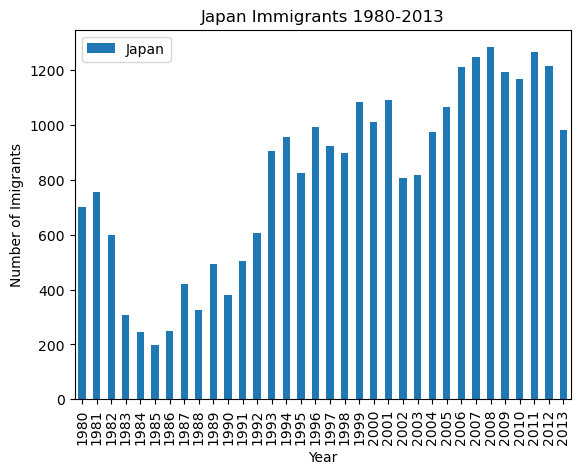

In [149]:
df_japan.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Imigrants')
plt.title('Japan Immigrants 1980-2013')
plt.show()

Bar plot merupakan cara merepresentasikan data dengan sumbu x digunakan untuk labelliing dan sumbu y atau panjang batang akan bersesuaian dengan besaran variabel yang diukur. Dalam hal ini, diperoleh data imigran jepang sebagai berikut. <br> 
- Pada tahun 1980 sebanyak $\pm 700$ orang <br>
- pada tahun 2013 sebanyak $\pm 1000$ orang <br>
- jumlah imigran paling sedikit terjadi pada tahun 1985  dan <br> 
- jumlah imigran terbanyak terjadi pada tahun 2008.

In [130]:
df_top15 = df_can.sort_values('Total',ascending=False).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,2338,2805,2979,2087,2598,3790,3819,3005,3501,3250,4093,4938,7108,7618,9619,7342,7117,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,4808,6931,9211,16025,17040,16028,12145,6960,3550,2405,2136,1758,1488,1354,1471,1601,1447,1394,1533,1405,1263,1235,1267,1013,795,720,779,852,139241


In [131]:
years_80s = list(map(str,range(1980,1990)))
years_90s = list(map(str,range(1990,2000)))
years_00s = list(map(str,range(2000,2010)))

df_80s = df_top15.loc[:,years_80s].sum(axis=1)
df_90s = df_top15.loc[:,years_90s].sum(axis=1)
df_00s = df_top15.loc[:,years_00s].sum(axis=1)

new_df = pd.DataFrame({'80s':df_80s,'90s':df_90s,'00s':df_00s})
new_df

,80s,90s,00s
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183
Poland,57602,64864,13629


X-Y plot

In [153]:
df_tot = df_can[years].sum(axis=0).to_frame()
df_tot.index = df_tot.index.astype(int)
df_tot.reset_index(inplace=True)
df_tot.rename(columns={'index':'year',0:'total'},inplace=True)
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


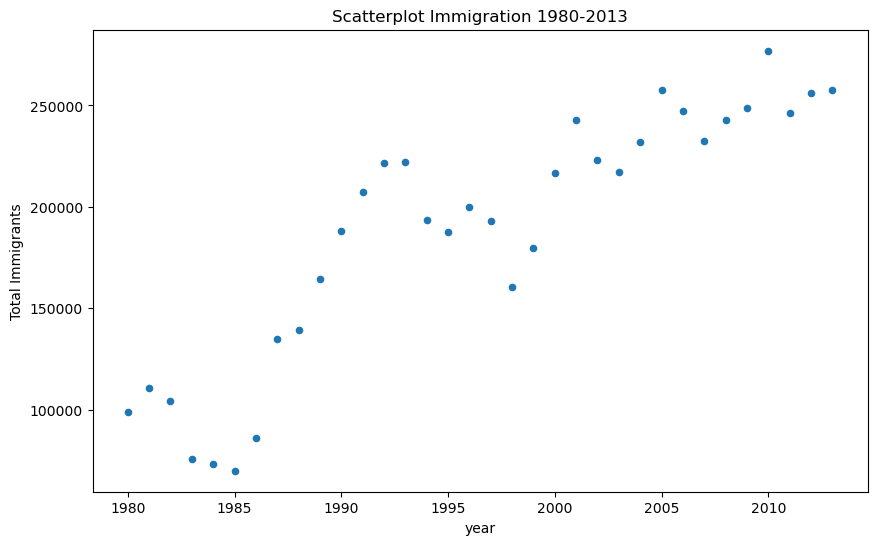

In [154]:
df_tot.plot(kind='scatter',x='year',y='total',figsize=(10,6))
plt.title('Scatterplot Immigration 1980-2013')
plt.ylabel('Total Immigrants')
plt.show()

Scatter plot merupakan metode untuk membandingkan variabel. Data dalam scatter juga biasanya digunakan untuk mengekspresikan suatu tren. Dalam hal ini, diperoleh total imigran dari tahun ke tahun cenderung mengalami tren positif, yaitu meningkatnya jumlah imigran dari tahun-tahun sebelumnya.

Heatmap

In [155]:
x = np.arange(21)
y = 5 + 2*x + 2*np.random.rand(21)

covariance dilambangkan dengan s <br>
cov_xy = $s^{xy} = \frac{\sum\limits^{n}_{i=0}(x_{i} - \bar{x})(y_{i} - \bar{y})}{n-1}$ <br>
Maka jika variabel identik didapat <br>
cov_xx = $s^{xx} = \frac{\sum\limits^{n}_{i=0}(x_{i} - \bar{x})^{2}}{n-1} = (s^{x})^{2} $ <br>
cov_yy = $s^{yy} = \frac{\sum\limits^{n}_{i=0}(y_{i} - \bar{y})^{2}}{n-1} = (s^{y})^{2}$ <br>

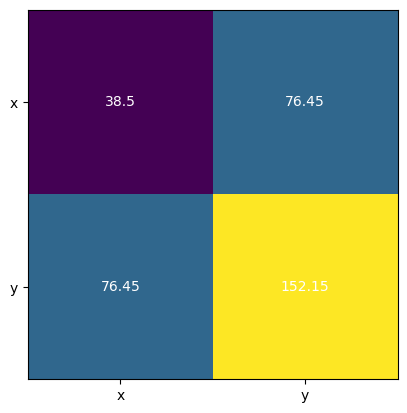

In [158]:
matrix = np.cov(x,y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.set_ylim(1.5, -0.5)
for i in range(2): 
    for j in range(2): 
        ax.text(j,i, 
                matrix[i,j], 
                ha='center', 
                va='center', 
                color='w')
plt.show()

correlation covariance dilambangkan dengan r <br>
$r = \frac{s^{xy}}{s^{x}s^{y}}$

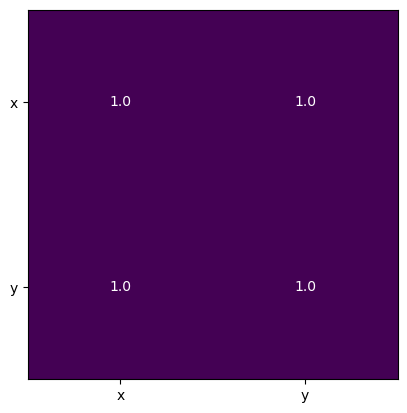

In [159]:
matrix = np.corrcoef(x,y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.set_ylim(1.5, -0.5)
for i in range(2): 
    for j in range(2): 
        ax.text(j,i, 
                matrix[i,j], 
                ha='center', 
                va='center', 
                color='w')
plt.show()

Heatmap merupakan suatu visualisasi yang menampilkan data dengan representasi warna yang berbeda-beda. Dalam hal ini, diperoleh matriks plot berupa matriks yang memiliki nilai koefisien korelasi maksimum, yaitu 1. Artinya, korelasi antar data sangat kuat.